In [9]:
from matplotlib import pyplot as plt
import numpy as np

timesteps = 200

files = [
    ("baseline", "baseline_fidelities.npz"),
    #("Do nothing", "Do nothing.npz"),
    ("Stabilizer code", "Stabilizer code.npz"),
    #("t=2 optimized BS", "lut_t=2_l=2_w=11_noise=0.0_s=0_trained_on_bloch_sphere.npz"),
    ("b) $\\gamma=0.05$", "lut_t=3_l=2_w=111_noise=0.0_s=1_trained_on_bloch_sphere.npz"),
    ("a) $\\gamma=0.05$", "lut_t=3_l=2_w=111_noise=0.0_s=2_trained_on_discrete_states.npz"),
    ("b) $\\gamma=0.25$", "lut_t=3_l=2_w=111_noise=0.0_s=1_trained_on_bloch_sphere_high_decay.npz"),
    ("a) $\\gamma=0.25$", "lut_t=3_l=2_w=111_noise=0.0_s=2_trained_on_discrete_states_high_decay.npz"),
]

scores =  [0.55428222 0.80587475 0.81433543 0.82293222 0.79222677 0.78901719]


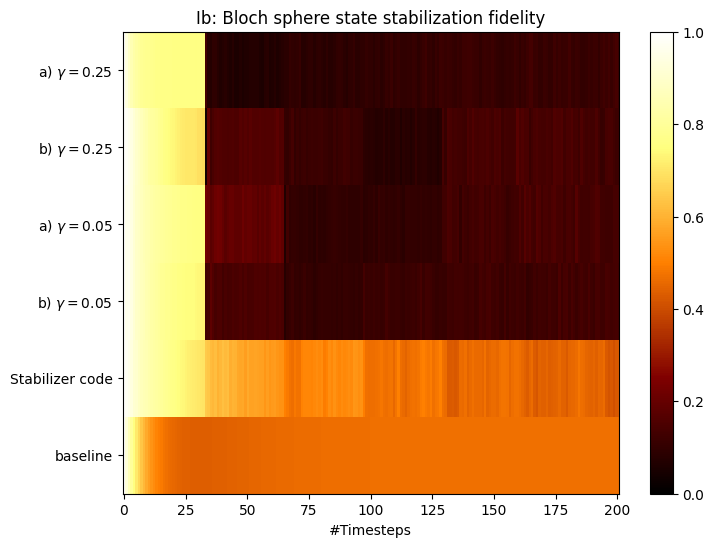

In [11]:
# Open all files, stack to matrix and plot
fidelities_all = np.zeros((len(files), timesteps+1))
labels = []
for i, (label, file) in enumerate(files):
    data = np.load(file)
    fidelities = data["fidelities"]
    fidelities_all[i, :] = fidelities
    labels.append(label)

# Plot the fidelities over time in 2d colormap
fig, ax = plt.subplots(figsize=(8,6))
cax = ax.imshow(
    fidelities_all,
    aspect='auto',
    origin='lower',
    cmap='afmhot',
    vmin=0.0,
    vmax=1.0,
    interpolation='none'
)
fig.colorbar(cax)
ax.set_xlabel('#Timesteps')
ax.set_yticks(np.arange(len(labels)))
ax.set_yticklabels(labels)
ax.set_title("Ib: Bloch sphere state stabilization fidelity")
fig.savefig("Ib.png")
print("scores = ", fidelities_all[:,:33].mean(axis=1))